https://www.kaggle.com/c/tutors-expected-math-exam-results - предсказание среднего балла на ЕГЭ по математике, задача регрессии.

Можно начинать ознакамливаться с задачами и начинать решать. При решении разрешены только следующие импорты / зависимости:


import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка тренировочных и тестовых данных
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print('Data is loaded!')

Data is loaded!


In [3]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [5]:
num_features = ['age', 'years_of_experience', 'lesson_price', 'qualification']
cat_features = ['physics', 'chemistry', 'biology', 'english', 'geography', 'history']
target_name = 'mean_exam_points'

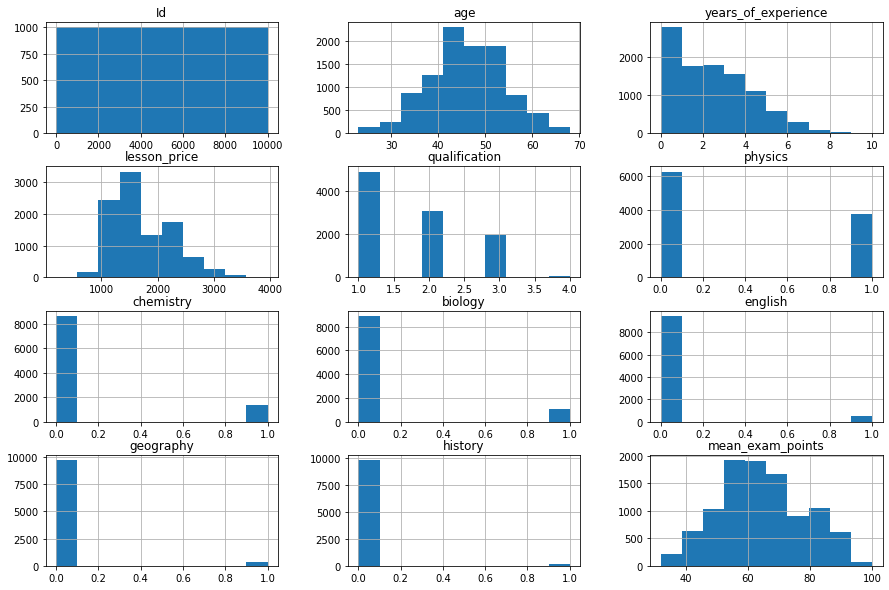

In [6]:
df_train.hist(figsize=(15,10));

<AxesSubplot:>

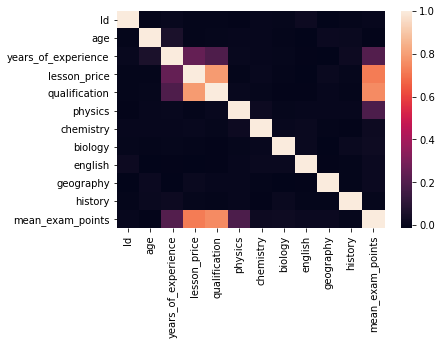

In [7]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix)

In [8]:
corr_matrix.loc['mean_exam_points'].abs().sort_values() # Параметры history, id, age практически не имеют корреляцонной знаимости

history                0.000113
Id                     0.004121
age                    0.007646
english                0.013174
geography              0.014401
chemistry              0.017825
biology                0.023022
physics                0.187726
years_of_experience    0.205417
lesson_price           0.721179
qualification          0.755963
mean_exam_points       1.000000
Name: mean_exam_points, dtype: float64

In [9]:
# Функции масштабирования данных
def standart_scale(X):
    X = (X - X.mean()) / X
    return X
def minmax_scale(X):
    X = (X - X.min())/(X.max() - X.min())
    return X

In [10]:
X_num = df_train[num_features].values
X_num

array([[4.00e+01, 0.00e+00, 1.40e+03, 1.00e+00],
       [4.80e+01, 4.00e+00, 2.85e+03, 3.00e+00],
       [3.90e+01, 0.00e+00, 1.20e+03, 1.00e+00],
       ...,
       [3.40e+01, 1.00e+00, 1.25e+03, 1.00e+00],
       [3.30e+01, 3.00e+00, 1.10e+03, 1.00e+00],
       [3.50e+01, 0.00e+00, 1.45e+03, 1.00e+00]])

In [11]:
# Масштабируем числовые переменные, чтобы все признаки были в одном масштабе в интервале [0, 1]. Так как линейная регрессия чувствительна к масштабу.
X_num[:,0] = minmax_scale(X_num[:,0])
X_num[:,1] = minmax_scale(X_num[:,1])
X_num[:,2] = minmax_scale(X_num[:,2])
X_num[:,3] = minmax_scale(X_num[:,3])
X_num

array([[0.37777778, 0.        , 0.32      , 0.        ],
       [0.55555556, 0.4       , 0.70666667, 0.66666667],
       [0.35555556, 0.        , 0.26666667, 0.        ],
       ...,
       [0.24444444, 0.1       , 0.28      , 0.        ],
       [0.22222222, 0.3       , 0.24      , 0.        ],
       [0.26666667, 0.        , 0.33333333, 0.        ]])

In [12]:
X_cat = df_train[cat_features].values

In [13]:
X = np.concatenate([X_num, X_cat], axis=1) # numpy массив из данных обучаемой выборки
y = df_train[target_name].values # numpy массив значений целефой переменной

In [14]:
X.shape, y.shape

((10000, 10), (10000,))

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [16]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7000, 10), (3000, 10), (7000,), (3000,))

#### Линейная модель и градиентный спуск для регрессии

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def line_gd_model(X, y, iterations, qty_in_batch=1, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors =[]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1

    for i in range(1, iterations+1):
        # эпоха обучения
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp.T)
            err = calc_mse(y_tmp, y_pred_tmp)
            errors.append(err)
            W -= (eta * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))

    if i % (iterations / 100) == 0:
        print(i, W, err)
        
    return W, errors

def line_reg_l2_model(X, y, iterations, eta=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X.T)
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (eta * (1/n * 2 * np.dot((y_pred - y), X))) + (2*lambda_*W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

In [19]:
W_line, errors_1 = line_reg_l2_model(X_train, y_train, iterations=1000, eta=0.1) # Проверяем с разными параметрами iterations и alpha.

100 [47.44020663 16.85341463 54.93088573 26.94704529 10.34331424  4.94553611
  5.98832521  5.05030188  3.59439744  1.86515297] 181.58500604818076
200 [44.94788993 13.89603079 64.7224295  22.41607248  9.38663925  3.64919246
  4.76532385  4.90354916  3.20732783  2.08357377] 167.7557905462718
300 [42.32019342 11.66008935 72.40727429 18.43193103  9.15578895  3.32353274
  4.40195247  4.7104063   2.88870001  2.15506354] 158.9677687352293
400 [40.04504946 10.03163535 78.66280248 15.16806971  8.99046914  3.14042699
  4.21198338  4.53850996  2.65112321  2.14883136] 153.14973101971188
500 [38.13706872  8.81995493 83.76630022 12.49592212  8.85889991  3.0007189
  4.07522296  4.39427798  2.47241984  2.10039895] 149.28393549407744
600 [36.55602063  7.89785517 87.93065918 10.30703605  8.75251958  2.88818273
  3.96746718  4.27542437  2.33554171  2.03133455] 146.71156933662039
700 [35.25354808  7.18295829 91.3289196   8.51478753  8.66608717  2.79666502
  3.88066479  4.17806649  2.22895029  1.95477628] 

In [20]:
def predict_line(W, X):
    y_pred = np.dot(X, W.T)
    return y_pred  

In [22]:
y_pred_line = predict_line(W_line, X_val)

In [23]:
def r_2(y_pred, y_true):
    numerator = ((y_true - y_pred) ** 2).sum(axis=0)
    denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0)
    return 1 - (numerator / denominator)

In [24]:
print(r_2(y_pred_line, y_val)) # Очень маленький результат

0.17941470175677487


In [25]:
check_test = pd.DataFrame({
    "y_val": y_val,
    "y_pred_line": y_pred_line.flatten()
})
 
check_test.head(10)

,y_val,y_pred_line
0,91.0,82.606087
1,70.0,58.533355
2,71.0,65.918386
3,58.0,58.104192
4,59.0,56.673085
5,45.0,66.438599
6,72.0,68.687149
7,65.0,72.101817
8,84.0,80.970958
9,86.0,100.207462


In [27]:
W_gd, errors_2 = line_gd_model(X_train, y_train, iterations=1000, qty_in_batch=1, eta=0.1) # Оптимальные веса

1000 [32.62196156  5.82850318 98.14440572  4.90788     8.49349417  2.6101593
  3.71051414  3.98173598  2.02497305  1.74361004] 53.97828713705059


In [29]:
y_pred_gd = predict_line(W_gd, X_val)
print(r_2(y_pred_gd, y_val)) # Практичсеки такой же результат.

0.17928387432009818


#### Дерево решений для задачи регрессии и градиентный бустинг

In [65]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [66]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        #  найдем значение как среднее по выборке   
        prediction = np.mean(self.labels)
        return prediction

In [76]:
# Алгоритм построения дерева
class Tree:

    def __init__(self, max_depth=50):
        self.max_depth = max_depth
        self.tree = None

  # Расчёт дисперсии значений
    def dispersion(self, labels):
        return np.std(labels)

    def quality(self, left_labels, right_labels, current_dispersion):

    # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)

    # Разбиение датасета в узле
    def split(self, data, labels, index, t):
    
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)
        
        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]
        
        return true_data, false_data, true_labels, false_labels

    # Нахождение наилучшего разбиения
    def find_best_split(self, data, labels):
    
    # минимальное количество объектов в узле
        min_leaf = 5

        current_dispersion = self.dispersion(labels)

        best_quality = 0
        best_t = None
        best_index = None
    
        n_features = data.shape[1]
    
        for index in range(n_features):
      # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])
      
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
        #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_leaf or len(false_data) < min_leaf:
                    continue
        
                current_quality = self.quality(true_labels, false_labels, current_dispersion)
        
        #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    # Построение дерева 
    def build_tree(self, data, labels, tree_depth, max_depth):

        quality, t, index = self.find_best_split(data, labels)

    #  Прекращаем рекурсию, когда нет прироста в качестве
        if quality == 0:
            return Leaf(data, labels)

    # Прекращаем рекурсию, когда достигнута максимальная глубина дерева
        if tree_depth >= max_depth:
            return Leaf(data, labels)

    # Увеличиваем глубину дерева на 1
        tree_depth += 1

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

    # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels, tree_depth, max_depth)
        false_branch = self.build_tree(false_data, false_labels, tree_depth, max_depth)

    # Возвращаем класс узла со всеми поддеревьями
        return Node(index, t, true_branch, false_branch)

    def predict_object(self, obj, node):

    #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)

    def predict(self, data):
        val = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            val.append(prediction)
        return val

    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels, 0, self.max_depth)
        return self


In [77]:
# #Реализация градиентного бустинга

class GradientBoosting:
  
    def __init__(self, n_trees, max_depth, coefs, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.coefs = coefs
        self.eta = eta
        self.trees = []

    def bias(self, y, z):
        return (y - z)

    def fit(self, X_train, y_train):
    
        trees = []
    
        for i in range(self.n_trees):
            tree = Tree(max_depth=self.max_depth)

       # Первый алгоритм обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
            # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
            else:
            # Получим ответы на текущей композиции
                target = self.predict(X_train)
            
            # алгоритмы начиная со второго обучаем на сдвиг
                bias = self.bias(y_train, target)
                tree.fit(X_train, bias)

            self.trees.append(tree)
        
        return self
    
    def predict(self, X):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
        return np.array([sum([self.eta* coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

In [78]:
# Число деревьев в ансамбле
n_trees = 30

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 1

In [80]:
gb = GradientBoosting(n_trees, max_depth, coefs, eta)
gb.fit(X_train, y_train)
train_gb = gb.predict(X_train)
val_gb = gb.predict(X_val)
print(r_2(train_gb, y_train))
print(r_2(val_gb, y_val)) # У этой модели хорошие показатели

0.7937439354791632
0.7737513864937398


In [81]:
# Преобразование данных в тестовом датасете
X_num_test = df_test[num_features].values


In [82]:
X_num_test[:,0] = minmax_scale(X_num_test[:,0])
X_num_test[:,1] = minmax_scale(X_num_test[:,1])
X_num_test[:,2] = minmax_scale(X_num_test[:,2])
X_num_test[:,3] = minmax_scale(X_num_test[:,3])

In [83]:
X_cat_test = df_test[cat_features].values

In [84]:
X_test = np.concatenate([X_num_test, X_cat_test], axis=1) # numpy массив из данных обучаемой выборки

In [85]:
#обучение на всех данных из обучающей выборки
gb_all_train = GradientBoosting(n_trees, max_depth, coefs, eta)
gb_all_train.fit(X, y)

In [87]:
#Предсказания для тестового датасета
predictions = gb_all_train.predict(X_test)

In [95]:
test_data = pd.DataFrame(data = {'Id': df_test['Id'], 'mean_exam_points': pd.Series(predictions)})
test_data.to_csv('AChernova_predictions_1.csv', index=False, sep=',')